In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importing the csv file
df = pd.read_csv("Media Expert laptop prices.csv")
df.head()

,Size,Resolution,Refresh rate,Processor,RAM,Disc,Graphics card,Price in zl
0,"15.6""",1920 x 1080px,120Hz,Intel Core i7-11370H,8,512 GB SSD,NVIDIA GeForce GTX 1650,3599
1,"16.1""",1920 x 1080px,60Hz,AMD Ryzen 5 5600H,8,512 GB SSD,NVIDIA GeForce GTX 1650,3799
2,"15.6""",1920 x 1080px,240Hz,AMD Ryzen 9 5900HX,16,1000 GB SSD,AMD Radeon RX 6700M,7499
3,"15.6""",1920 x 1080px,144Hz,AMD Ryzen 7 6800H,16,512 GB SSD,NVIDIA GeForce RTX 3050 Ti,6199
4,"16.1""",1920 x 1080px,144Hz,Intel Core i7-11800H,8,512 GB SSD,NVIDIA GeForce RTX 3060,5999


In [3]:
# Checking the size of the DataFrame
df.shape

(1000, 8)

In [4]:
# Searching for non-matching values
df.Size.value_counts(dropna = False)

15.6"            477
14"              140
17.3"            101
16.1"             74
13.3"             59
16"               47
13.4"             22
13.6"             12
16.2"             10
14.2"             10
13.5"              9
11.6"              8
17"                7
13"                7
14.1"              4
10.5"              3
10.1"              2
12.3"              2
12.6"              1
12.45"             1
14.5"              1
15"                1
1920 x 1080px      1
13.9"              1
Name: Size, dtype: int64

In [5]:
df[df.Size == "1920 x 1080px"]

,Size,Resolution,Refresh rate,Processor,RAM,Disc,Graphics card,Price in zl
655,1920 x 1080px,60Hz,60Hz,Intel Core i7-11800H,16,1000 GB SSD,NVIDIA GeForce RTX 3050 Ti,8369


In [6]:
# Removing the faulty row
df1 = df.drop(655)

In [7]:
# Converting to float
df1.Size = df1.Size.apply(lambda x: float(x.strip('"')))
df1.Size

0      15.6
1      16.1
2      15.6
3      15.6
4      16.1
       ... 
995    15.6
996    15.6
997    15.6
998    14.0
999    15.6
Name: Size, Length: 999, dtype: float64

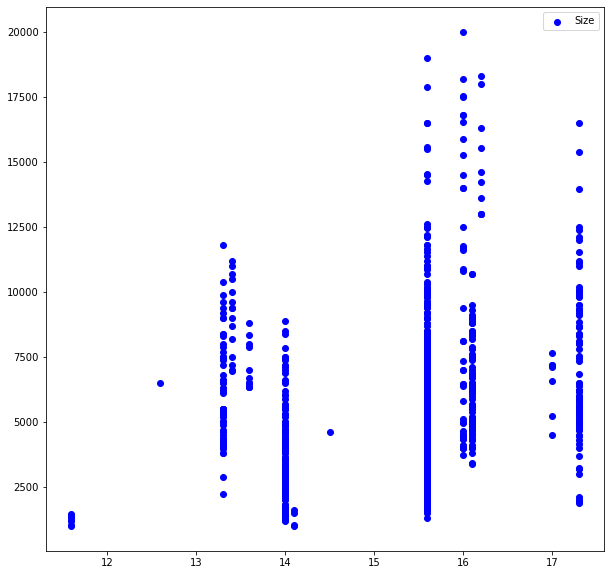

In [37]:
# Plotting the relationship between the price and the size of a laptop
plt.scatter(df1["Size"], df1["Price in zl"], label = "Size", color="blue")
plt.legend()
plt.show()

In [8]:
# Searching for non-matching values
df1.Resolution.value_counts(dropna = False)

 1920 x 1080px    701
 2560 x 1600px     83
 2560 x 1440px     59
 1920 x 1200px     33
 1366 x 768px      23
 2560 x 1664px     12
 3840 x 2160px     11
 3456 x 2234px     10
 2256 x 1504px      8
 1600 x 900px       8
 3024 x 1964px      7
 2880 x 1920px      7
 3840 x 2400px      6
 2240 x 1400px      4
 2520 x 1680px      3
 1920 x 1280px      3
 2880 x 1800px      3
 2160 x 1440px      2
 1280 x 800px       2
 2160 x 1140px      2
 3000 x 2000px      2
 2736 x 1824px      2
 3072 x 1920px      2
 2880 x 1620px      1
 2496 x 1664px      1
 3456 x 2160px      1
 3120 x 2080px      1
 1536 x 1024px      1
 1440 x 900px       1
Name: Resolution, dtype: int64

In [9]:
# Removing rare values
counts = df1.Resolution.value_counts()
resolutions = df1[df1.Resolution.isin(counts[counts < 10].index)]
df1 = df1.drop(index=resolutions.index)

In [10]:
# Searching for non-matching values
df1['Refresh rate'].value_counts(dropna = False)

 60Hz             409
 144Hz            212
 165Hz            101
 120Hz             87
 1920 x 1080px     34
 240Hz             28
 2560 x 1600px     25
 2560 x 1664px      9
 360Hz              8
 1366 x 768px       6
 Dotykowy           6
 300Hz              5
 1920 x 1200px      2
Name: Refresh rate, dtype: int64

In [11]:
# All modern laptops have at least 60Hz refresh rate - let's replace all the inappropriate values with the most common   
df1['Refresh rate'] = df1['Refresh rate'].apply(lambda x: " 60Hz" if x[-1] != "z" else x)
df1['Refresh rate'].value_counts()

 60Hz     491
 144Hz    212
 165Hz    101
 120Hz     87
 240Hz     28
 360Hz      8
 300Hz      5
Name: Refresh rate, dtype: int64

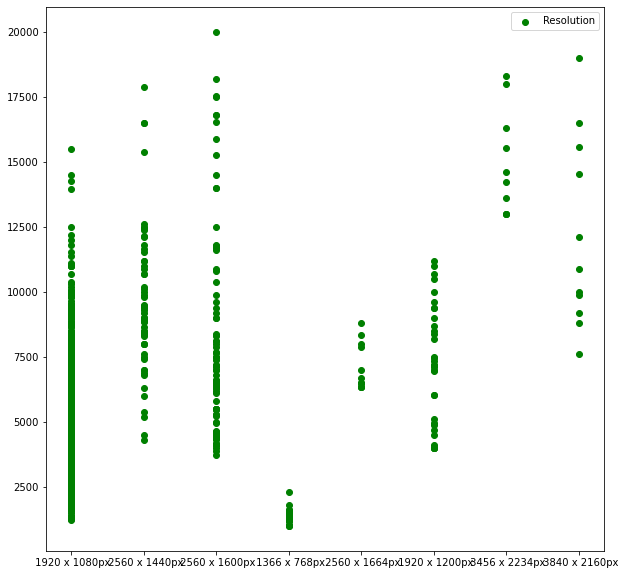

In [38]:
# Plotting the relationship between the price and the resolution of a screen in a laptop
plt.scatter(df1["Resolution"], df1["Price in zl"], label = "Resolution", color="green")
plt.legend()
plt.show()

In [12]:
df2 = df1.copy()

In [13]:
# Searching for non-matching values
df2.Processor.value_counts(dropna = False)

Intel Core i7-12700H     92
AMD Ryzen 5 5600H        67
Intel Core i5-1135G7     62
Intel Core i7-11800H     61
AMD Ryzen 7 5800H        50
                         ..
Intel Core i7-8550U       1
AMD Ryzen 7 4800HS        1
Intel Core i5-1038NG7     1
Intel Core i7-8565U       1
Intel Core i7-11390H      1
Name: Processor, Length: 113, dtype: int64

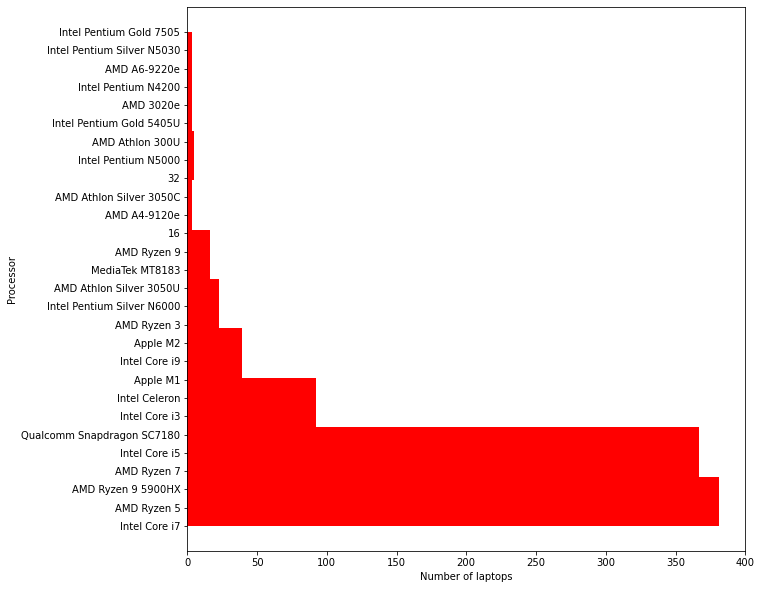

In [32]:
# Plotting a histogram of "Processor" column
plt.hist(df2.Processor, orientation='horizontal', color = "red")
plt.xlabel("Number of laptops")
plt.ylabel("Processor")
plt.show()

In [15]:
# List of the most popular processors
processors = ["Intel Core i3", "Intel Core i7", "Intel Core i5", "Intel Core i9", "AMD Ryzen 3", "AMD Ryzen 7", 
              "AMD Ryzen 5","AMD Ryzen 9","Apple M1", "Apple M2", "Intel Celeron"]

In [16]:
# Simplification of the "Processor" column 
for i in df2.Processor:
     for p in processors:
        if p in i:
            df2.Processor = df2.Processor.replace([i], p)


In [17]:
df2.Processor.value_counts()

Intel Core i5                 257
Intel Core i7                 238
AMD Ryzen 5                   138
AMD Ryzen 7                   109
Intel Celeron                  34
Intel Core i3                  32
Apple M1                       26
Apple M2                       26
AMD Ryzen 3                    16
Intel Core i9                  13
AMD Ryzen 9                     8
MediaTek MT8183                 6
AMD Ryzen 9 5900HX              5
AMD Athlon Silver 3050U         4
Intel Pentium Silver N6000      3
16                              2
AMD A4-9120e                    2
32                              2
Intel Pentium N5000             2
Qualcomm Snapdragon SC7180      1
AMD Athlon Silver 3050C         1
AMD Athlon 300U                 1
Intel Pentium Gold 5405U        1
AMD 3020e                       1
Intel Pentium N4200             1
AMD A6-9220e                    1
Intel Pentium Silver N5030      1
Intel Pentium Gold 7505         1
Name: Processor, dtype: int64

In [18]:
# Deleting rows without the most common processors
df3 = df2.drop(index = df2[~df2.Processor.isin(processors)].index)
df3

,Size,Resolution,Refresh rate,Processor,RAM,Disc,Graphics card,Price in zl
0,15.6,1920 x 1080px,120Hz,Intel Core i7,8,512 GB SSD,NVIDIA GeForce GTX 1650,3599
1,16.1,1920 x 1080px,60Hz,AMD Ryzen 5,8,512 GB SSD,NVIDIA GeForce GTX 1650,3799
3,15.6,1920 x 1080px,144Hz,AMD Ryzen 7,16,512 GB SSD,NVIDIA GeForce RTX 3050 Ti,6199
4,16.1,1920 x 1080px,144Hz,Intel Core i7,8,512 GB SSD,NVIDIA GeForce RTX 3060,5999
5,16.1,1920 x 1080px,144Hz,Intel Core i5,8,512 GB SSD,NVIDIA GeForce RTX 3050 Ti,5199
...,...,...,...,...,...,...,...,...
995,15.6,1920 x 1080px,60Hz,AMD Ryzen 7,16,512 GB SSD,NVIDIA GeForce RTX 3050,4699
996,15.6,1920 x 1080px,60Hz,AMD Ryzen 3,4,256 GB SSD,AMD Radeon Graphics,1599
997,15.6,1920 x 1080px,60Hz,Intel Core i5,16,512 GB SSD,Intel Iris Xe Graphics,3699
998,14.0,1920 x 1080px,60Hz,Intel Core i5,16,512 GB SSD,Intel Iris Xe Graphics,4199


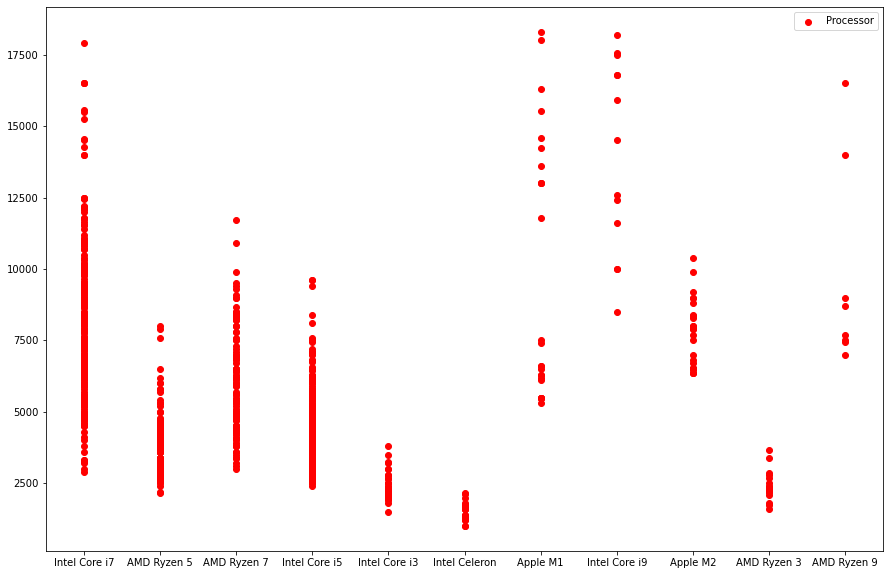

In [43]:
# Plotting the relationship between the price and the processor of a laptop
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(df3["Processor"], df3["Price in zl"], label = "Processor", color="red")
plt.legend()
plt.show()

In [19]:
# Searching for non-matching values
df3.RAM.value_counts(dropna = False)

16    478
8     324
32     52
4      43
Name: RAM, dtype: int64

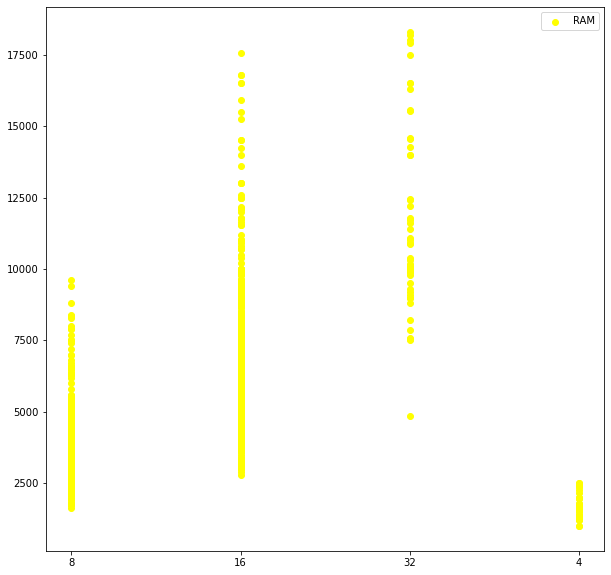

In [44]:
# Plotting the relationship between the price and the RAM of a laptop
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(df3["RAM"], df3["Price in zl"], label = "RAM", color="yellow")
plt.legend()
plt.show()

In [20]:
# Searching for non-matching values
df3.Disc.value_counts(dropna = False)

512 GB SSD                   519
1000 GB SSD                  217
256 GB SSD                   107
128 GB SSD                    15
128 GB Flash                  12
2000 GB SSD                    9
500 GB SSD                     7
64 GB Flash                    4
1000 (x2) GB SSD               3
32 GB Flash                    2
2000 GB HDD + 1000 GB SSD      1
64 GB SSD                      1
Name: Disc, dtype: int64

In [21]:
# Deleting rows without the most common discs
counts2 = df3.Disc.value_counts()
discs = df3[df3.Disc.isin(counts2[counts2 < 7].index)]
df3 = df3.drop(index = discs.index)

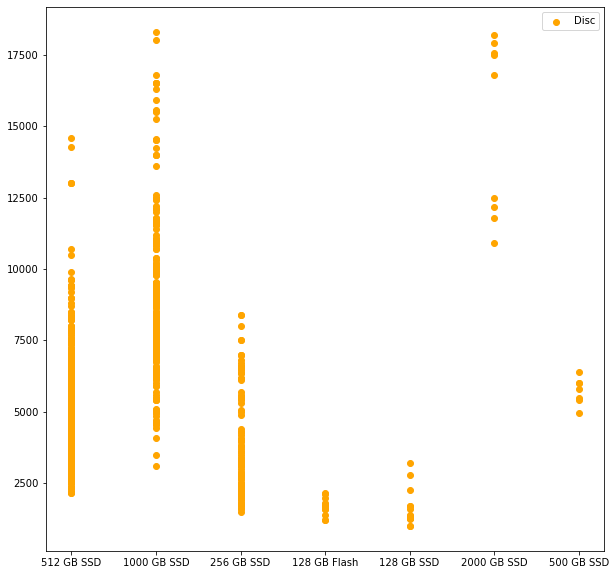

In [45]:
# Plotting the relationship between the price and the disc of a laptop
plt.scatter(df3["Disc"], df3["Price in zl"], label = "Disc", color="orange")
plt.legend()
plt.show()

In [22]:
# Searching for non-matching values
df3["Graphics card"].value_counts(dropna = False)

Intel Iris Xe Graphics                 137
NVIDIA GeForce RTX 3050                114
AMD Radeon Graphics                     87
NVIDIA GeForce RTX 3050 Ti              87
NVIDIA GeForce RTX 3060                 86
Intel UHD Graphics                      60
NVIDIA GeForce GTX 1650                 58
NVIDIA GeForce RTX 3070                 41
NVIDIA GeForce RTX 3070 Ti              38
Apple M2 (10 rdzeni)                    18
Intel UHD Graphics 600                  17
NVIDIA GeForce RTX 3080                 17
NVIDIA GeForce GTX 1650 Ti              12
Apple M1 (7 rdzeni)                      9
Intel UHD Graphics 620                   9
Apple M2 (8 rdzeni)                      8
NVIDIA GeForce RTX 3080 Ti               8
Apple M1 Pro (16 rdzeni)                 8
AMD Radeon Vega 8                        7
Apple M1 (8 rdzeni)                      7
Intel Iris Plus Graphics                 6
NVIDIA GeForce MX450                     6
NVIDIA GeForce MX350                     4
NVIDIA GeFo

In [23]:
# Deleting rows without the most common cards
counts3 = df3["Graphics card"].value_counts()
cards = df3[df3["Graphics card"].isin(counts3[counts3 < 7].index)]
df4 = df3.drop(index = cards.index)

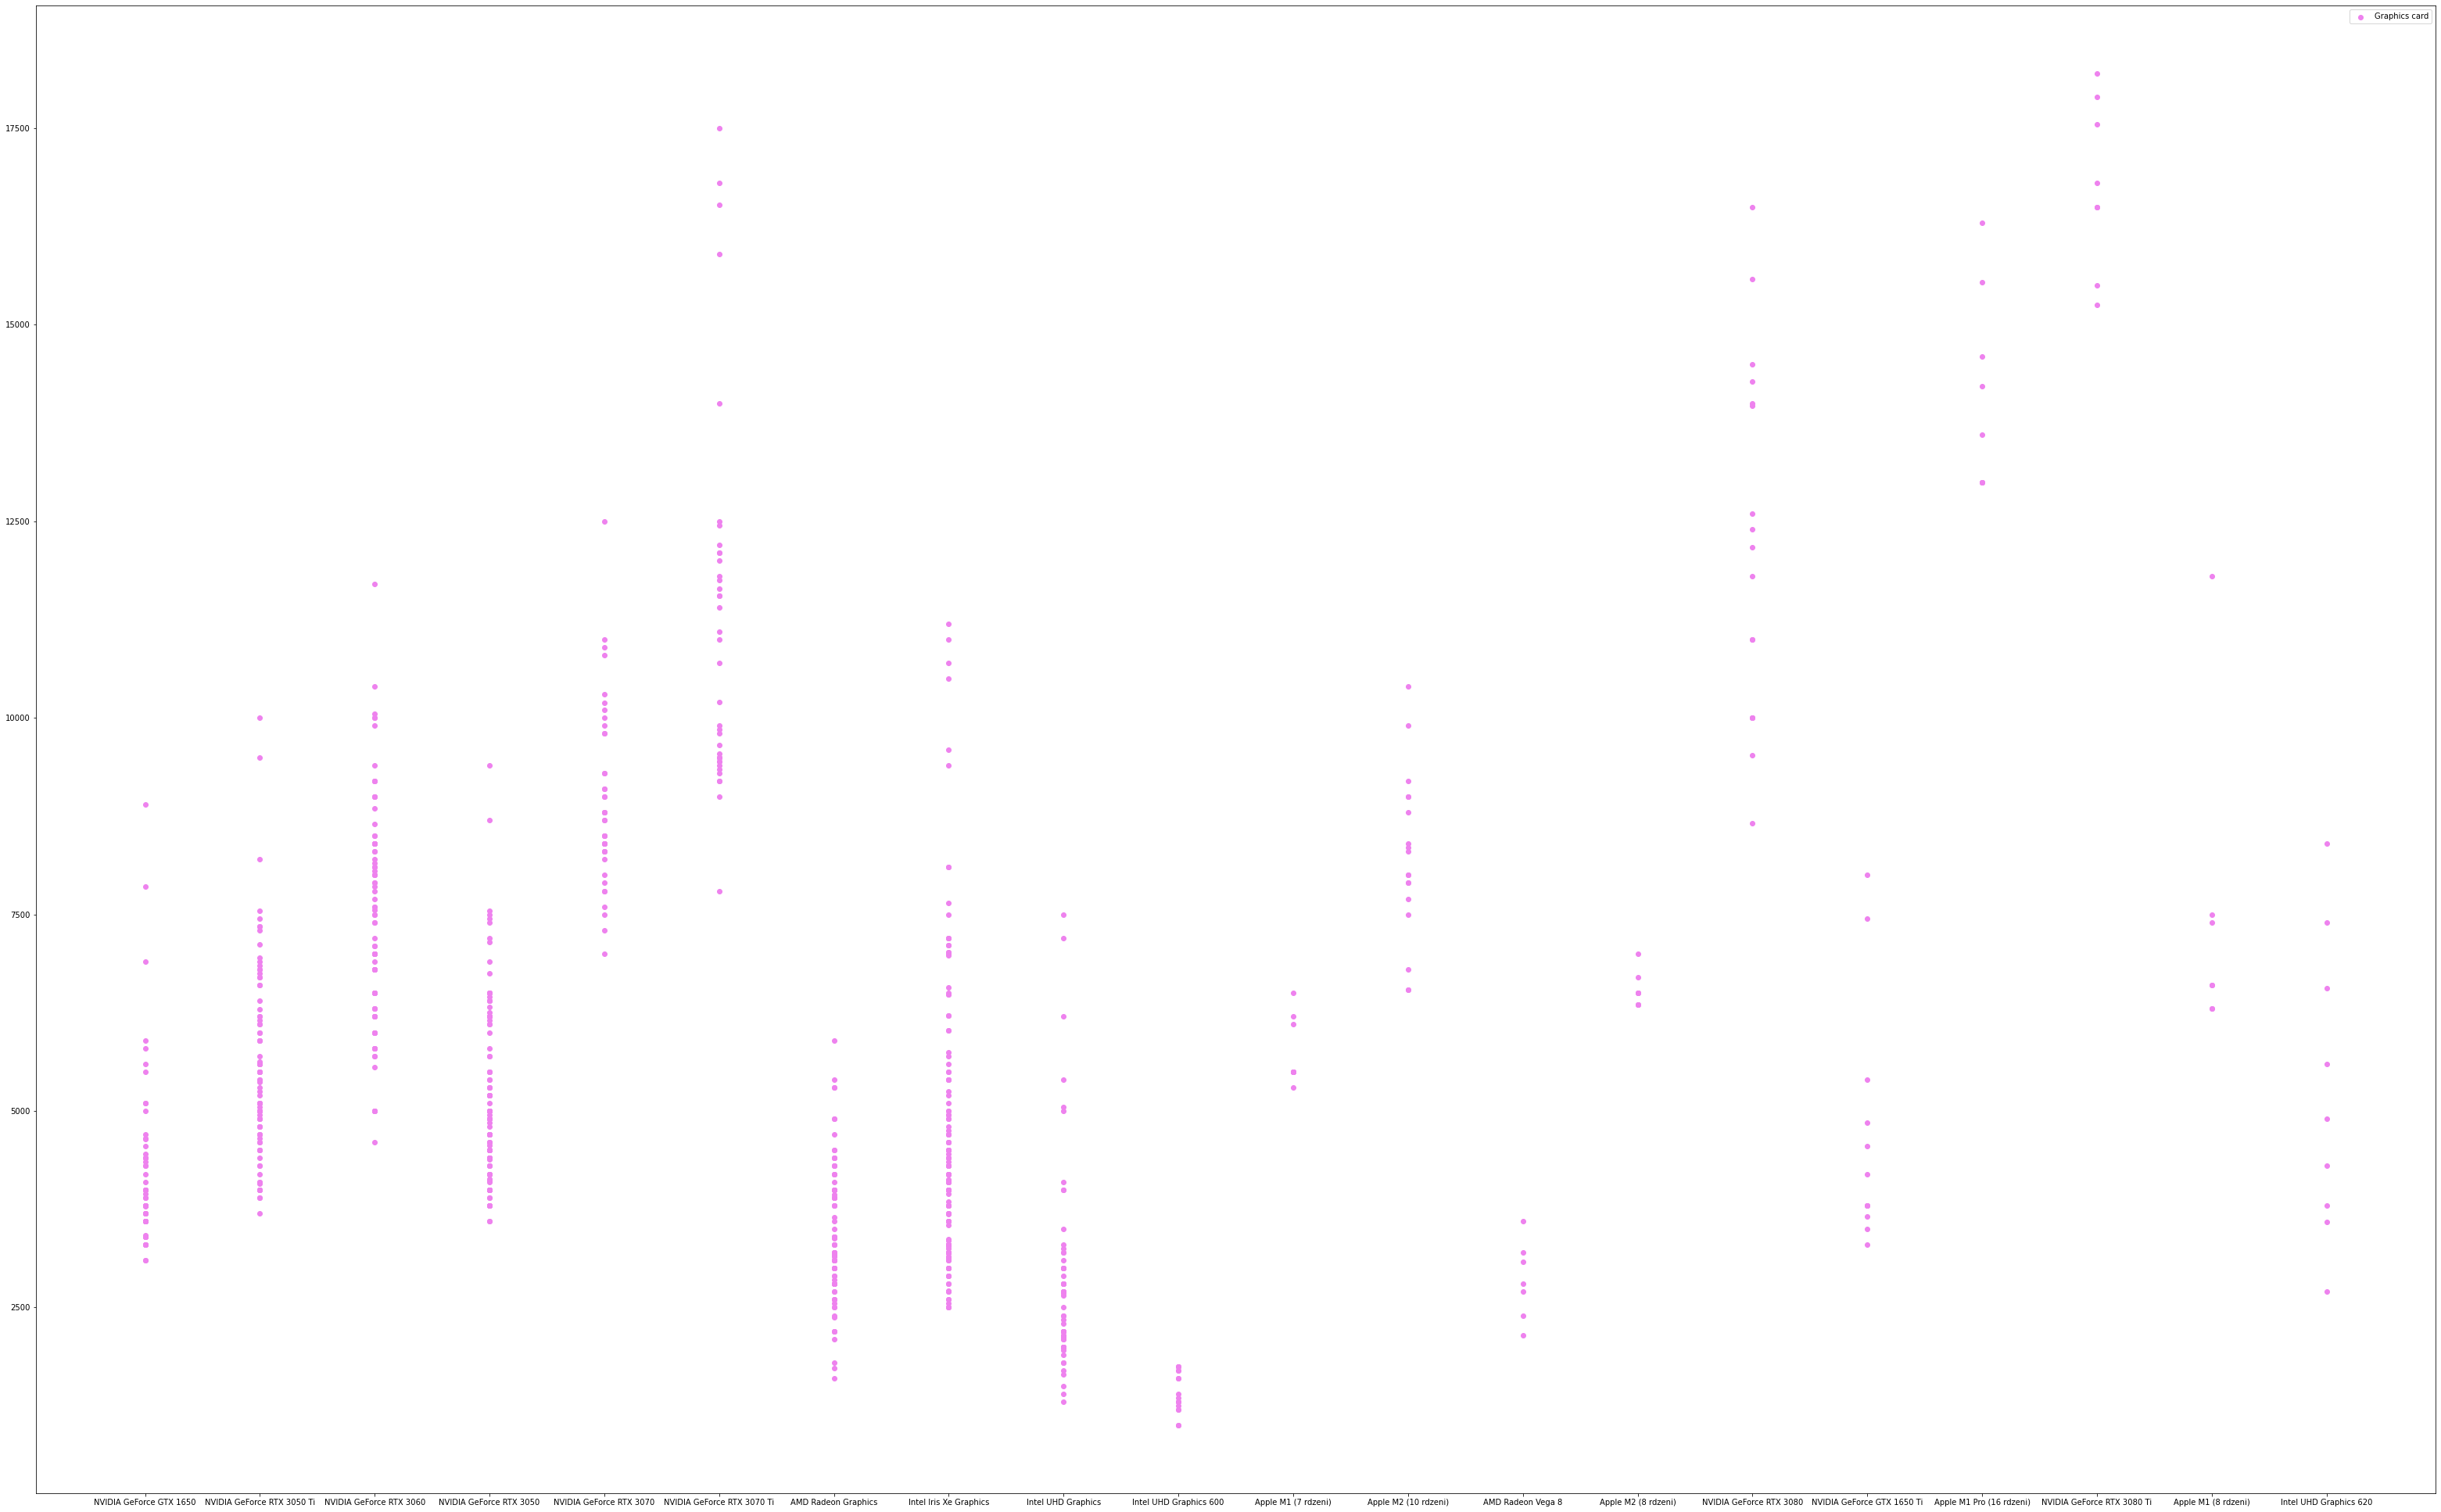

In [57]:
# Plotting the relationship between the price and the graphics card of a laptop
plt.rcParams["figure.figsize"] = (55,35)
plt.scatter(df4["Graphics card"], df4["Price in zl"], label = "Graphics card", color="violet")
plt.legend()
plt.show()

In [58]:
# Converting the prices to integer
df4["Price in zl"] = df4["Price in zl"].apply(lambda x: int(x))

In [59]:
# Preprocessing the columns
numeric_features = ["Size"]
numeric_transformer = Pipeline(steps = [("scaler", MinMaxScaler())])

categorical_features = ["Resolution", "Refresh rate", "Processor", "RAM", "Disc", "Graphics card"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [60]:
# Splitting the dataset
X = df4.drop("Price in zl", axis = 1)
y = df4["Price in zl"]

In [61]:
# Making the pipeline for LinearRegression
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.873


In [77]:
# Making a prediction
df4.loc[150:155]

,Size,Resolution,Refresh rate,Processor,RAM,Disc,Graphics card,Price in zl
151,15.6,1920 x 1080px,60Hz,Intel Core i7,8,512 GB SSD,NVIDIA GeForce GTX 1650 Ti,5399
152,13.6,2560 x 1664px,60Hz,Apple M2,8,256 GB SSD,Apple M2 (8 rdzeni),6499
153,15.6,1920 x 1080px,60Hz,Intel Core i3,4,256 GB SSD,Intel UHD Graphics,1999
154,15.6,1920 x 1080px,144Hz,AMD Ryzen 5,16,512 GB SSD,NVIDIA GeForce GTX 1650,3699
155,13.6,2560 x 1664px,60Hz,Apple M2,8,512 GB SSD,Apple M2 (10 rdzeni),7999


In [80]:
clf.predict(X.loc[150:155])

array([5050.06529098, 6463.28574911, 1920.03384084, 4009.58960892,
       8261.50010416])

In [81]:
# Let's compare the prediction with the actual prices
y.loc[150:155]

151    5399
152    6499
153    1999
154    3699
155    7999
Name: Price in zl, dtype: int64

In [171]:
# Making the pipeline for RandomForestRegressor
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf2.fit(X_train, y_train)

print("model score: %.3f" % clf2.score(X_test, y_test))

model score: 0.863


In [142]:
# Hyperparameter tuning
param_grid = {"classifier__n_estimators": [100, 150, 200], "classifier__criterion": ["squared_error", "absolute_error"], "classifier__bootstrap": [True, False]}
#print(clf2.get_params().keys())
grid = GridSearchCV(clf2, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'classifier__bootstrap': True,
 'classifier__criterion': 'absolute_error',
 'classifier__n_estimators': 100}

In [172]:
# The final RandomForestRegressor pipeline
clf3 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor(bootstrap = True, 
                                                                                criterion = 'absolute_error',
                                                                                n_estimators = 100))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf3.fit(X_train, y_train)

print("model score: %.3f" % clf3.score(X_test, y_test))

model score: 0.866


In [174]:
# The linearRegression pipeline seems to be the fastest and most accurate estimator - let's export the model to a pickle file
import pickle
with open('Media_Expert.pickle','wb') as f:
    pickle.dump(clf,f)